
## Data understanding
a) Define the question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism in patients


b) Metrics for success

The project will be considered successful if we are able to use decision trees and SVM to build several models that predict whether or not the patient's symptoms indicate that they have hypothyroid, then using their accuracy levels and RMSE values, pick the model that would be more accurate at the predictions

Hypothyroidism is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones.

Hypothyroidism may not cause noticeable symptoms in the early stages. However, over time, untreated hypothyroidism can cause a number of health problems, such as obesity, joint pain, infertility and heart disease.


c) Recording the experimental design
The steps followed include

Data Understanding
Data Preparation
Data Cleaning
Perform EDA
Modelling
Evaluation


## Data preparation

Importing the libraries.

In [80]:
#importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score

In [81]:
df = pd.read_csv('/content/hypothyroid.csv')

In [82]:
#previewing top of our dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [83]:
#previewing top of our dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [84]:
#getting shape of our dataset
df.shape

(3163, 26)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [86]:
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [87]:
# creating a separate copy of the dataset that we will do a bit of cleaning for SVM
dfclean = df.copy()
dfclean

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


### Data cleaning

In [88]:
#checking for null values
dfclean.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [89]:
#checking number of duplicate rows
dfclean.duplicated().sum()

77

In [90]:
#locating the duplicate rows
dfclean.loc[dfclean.duplicated(), :]


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
53,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,0.80,y,53,y,0.86,y,61,n,?
66,hypothyroid,62,M,f,f,f,f,f,f,f,f,f,f,f,y,100,y,0.40,y,10,y,1,y,10,n,?
124,hypothyroid,77,F,f,f,f,f,f,f,f,f,f,f,f,y,23,y,0.50,y,33,y,0.67,y,49,n,?
128,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29,y,1.60,y,47,y,0.97,y,48,n,?
131,hypothyroid,50,F,t,f,f,f,f,f,f,f,f,f,f,y,34,n,?,y,55,y,0.93,y,60,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,negative,28,M,f,f,f,f,f,f,f,f,f,f,f,y,1,y,3.10,y,107,y,1.05,y,103,n,?
3055,negative,33,F,f,f,f,f,f,f,f,f,f,f,f,n,?,y,0.80,y,88,y,1.02,y,86,n,?
3066,negative,74,F,t,f,f,f,f,f,f,f,f,f,f,y,21,y,1.80,y,126,y,1.18,y,107,n,?
3111,negative,89,M,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.90,y,82,y,0.80,y,103,n,?


In [91]:
#given our intention of prediction of hyperthyroidism we drop the duplicate columns
dfclean.drop_duplicates(inplace=True)
dfclean.duplicated().sum()

0

In [92]:
#checking our columns names
dfclean.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [93]:
#checking unique values for all columns to check for any anomalies
for col in dfclean.columns.to_list():
  print(f'{col} column unique values: ')
  print(dfclean[col].unique(), end='\n\n')

status column unique values: 
['hypothyroid' 'negative']

age column unique values: 
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']

sex column unique values: 
['M' 'F' '?']

on_thyroxine column unique values: 
['f' 't']

query_on_thyroxine column unique values: 
['f' 't']

on_antithyroid_medication column unique values: 
['f' 't']

thyroid_surgery column unique values: 
['f' 't']

query_hypothyroid column unique values: 
['f' 't']

query_hyperthyroid column unique values: 
['f' 't']

pregnant column unique values: 
['f' 't']

sick column unique values: 
['f' 't']

tumor colu

In [94]:
#replacing the '?' value with NaN for missing values
dfclean.replace(to_replace='?', inplace=True, value=np.NaN)

In [95]:

#defining our categorical and numerical columns and converting the datatypes
cat_cols = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
                       'TT4_measured', 'T4U_measured', 'FTI_measured']

# Numerical columns array 
num_cols = ['age','TSH','T3', 'TT4', 'T4U', 'FTI']

# for loop for converting columns to the right data types
for column in dfclean.columns:
  if column in num_cols:
    dfclean[column] = dfclean[column].astype('float')
  elif column in cat_cols:
    dfclean[column] = dfclean[column].astype('category')
#confirming change
dfclean.dtypes

status                         object
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                   object
TBG                            object
dtype: objec

In [96]:
dfclean.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

In [97]:
#dropping the columns
dfclean.drop(['TBG', 'TBG_measured'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

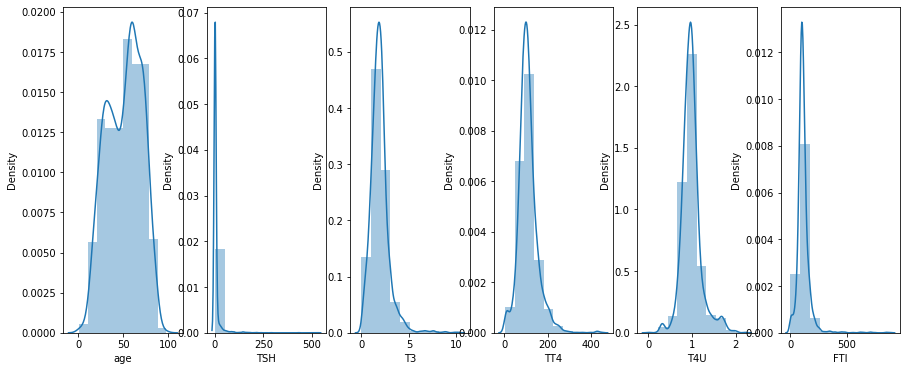

In [98]:
#checking distribution in our remaining columns with missing values
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1, 6, figsize= (15,6))

sns.distplot(dfclean.age, ax=ax1, bins= 10)
sns.distplot(dfclean.TSH, ax=ax2, bins= 10)
sns.distplot(dfclean.T3, ax=ax3, bins= 10)
sns.distplot(dfclean.TT4, ax=ax4, bins= 10)
sns.distplot(dfclean.T4U, ax=ax5, bins= 10)
sns.distplot(dfclean.FTI, ax=ax6, bins= 10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gender distribution')

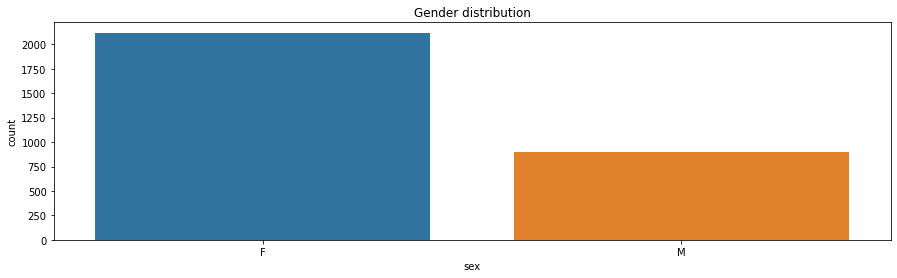

In [99]:
# checking distribution for gender
plt.figure(figsize=(15, 4))
sns.countplot(dfclean['sex'], order = dfclean['sex'].value_counts().index);
plt.title('Gender distribution')

In [100]:
#Replacing missing values
dfclean['age'].fillna(dfclean['age'].mean(), inplace = True)
dfclean['TSH'].fillna(dfclean['TSH'].mean(), inplace = True)
dfclean['T3'].fillna(dfclean['T3'].mean(), inplace = True)
dfclean['TT4'].fillna(dfclean['TT4'].mean(), inplace = True)
dfclean['T4U'].fillna(dfclean['T4U'].mean(), inplace = True)
dfclean['FTI'].fillna(dfclean['FTI'].mean(), inplace = True)
dfclean['sex'].fillna(dfclean['sex'].mode(), inplace = True)

In [101]:
#check for null values

dfclean.isnull().sum()

status                        0
age                           0
sex                          73
on_thyroxine                  0
query_on_thyroxine            0
on_antithyroid_medication     0
thyroid_surgery               0
query_hypothyroid             0
query_hyperthyroid            0
pregnant                      0
sick                          0
tumor                         0
lithium                       0
goitre                        0
TSH_measured                  0
TSH                           0
T3_measured                   0
T3                            0
TT4_measured                  0
TT4                           0
T4U_measured                  0
T4U                           0
FTI_measured                  0
FTI                           0
dtype: int64

In [102]:
# replace sex values
dfclean['sex'].fillna('F', inplace = True)
dfclean.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

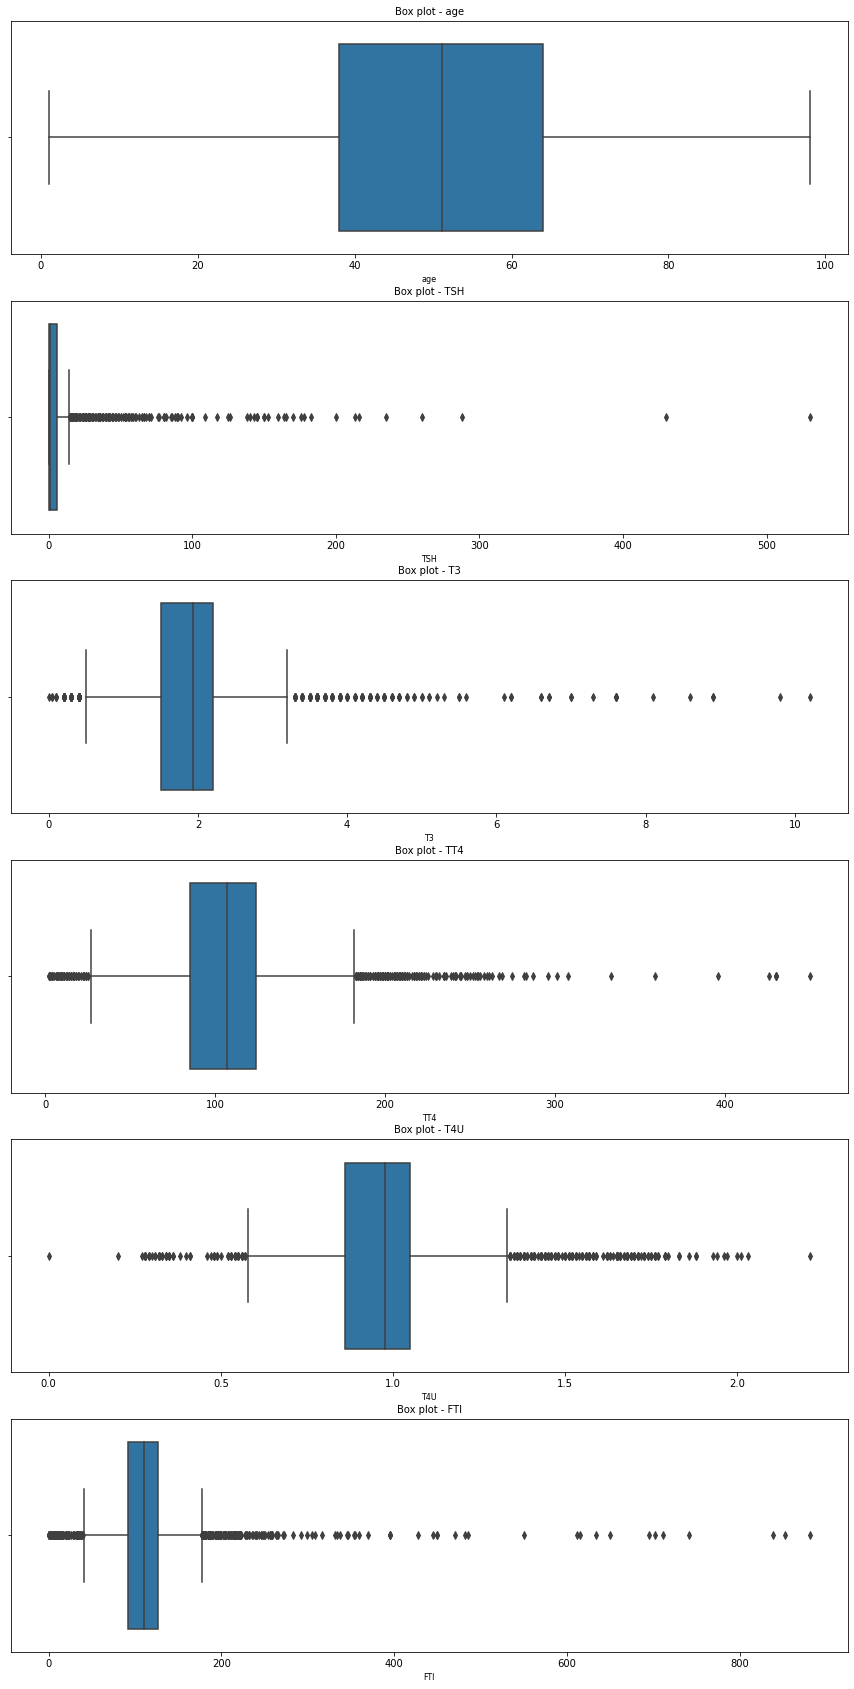

In [103]:
#checking for outliers
fig, ax = plt.subplots(len(num_cols), figsize= (15,30))

for i, col_val in enumerate(num_cols):
  sns.boxplot(dfclean[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

In [104]:
#Checking for number of outliers
Q1 = dfclean.quantile(0.25)
Q3 = dfclean.quantile(0.75)
IQR = Q3 -Q1
out = ((dfclean[num_cols] < (Q1 - 1.5 * IQR)) |(dfclean[num_cols] > (Q3 + 1.5 * IQR))).sum()
out

age      0
TSH    193
T3     240
TT4    238
T4U    240
FTI    285
dtype: int64

## EDA

Multivariate analysis

In [105]:
dfclean.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000
mean,51.112538,5.809320,1.933666,108.706922,0.977559,115.489080
std,17.854431,22.180994,0.864826,42.836471,0.216873,57.780967
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000
50%,51.112538,1.000000,1.933666,107.000000,0.977559,110.000000
75%,64.000000,5.809320,2.200000,124.000000,1.050000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


In [106]:
#Descriptive statistics
for i in num_cols:
  print(i)
  print(f'mean:  {dfclean[i].mean()}')
  print(f'median:  {dfclean[i].sort_values(ascending=False).median()}')
  print(f'mode:  {dfclean[i].mode()}')
  print(f'skewness:  {dfclean[i].skew()}')
  print(f'The Standard Deviation: {dfclean[i].std()}')
  print(f'The Variance: {dfclean[i].var()}')
  print(f'Kurtosis:  {dfclean[i].kurt()}, \n')

age
mean:  51.11253776435048
median:  51.112537764350456
mode:  0    51.112538
dtype: float64
skewness:  -0.18327889150126656
The Standard Deviation: 17.854430861173032
The Variance: 318.78070137640805
Kurtosis:  -0.6214515094605133, 

TSH
mean:  5.809319650323053
median:  1.0
mode:  0    0.0
dtype: float64
skewness:  11.145456810806497
The Standard Deviation: 22.180994332739
The Variance: 491.99650958899974
Kurtosis:  180.71322067683934, 

T3
mean:  1.9336658354114533
median:  1.9336658354114693
mode:  0    1.933666
dtype: float64
skewness:  2.4537697771079516
The Standard Deviation: 0.86482646769876
The Variance: 0.7479248192323144
Kurtosis:  14.89106068829793, 

TT4
mean:  108.70692199578384
median:  107.0
mode:  0    108.706922
dtype: float64
skewness:  1.5284024697504315
The Standard Deviation: 42.836471205741844
The Variance: 1834.9632653603503
Kurtosis:  7.679569618475355, 

T4U
mean:  0.9775588338602056
median:  0.9775588338602027
mode:  0    0.977559
dtype: float64
skewness:  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Hypothyroid Status distribution')

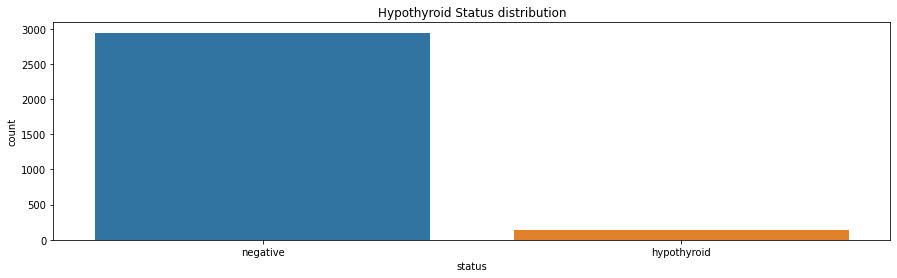

In [107]:
#Hypothyroid status distribution
plt.figure(figsize=(15, 4))
sns.countplot(dfclean['status'], order = dfclean['status'].value_counts().index);
plt.title('Hypothyroid Status distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gender distribution')

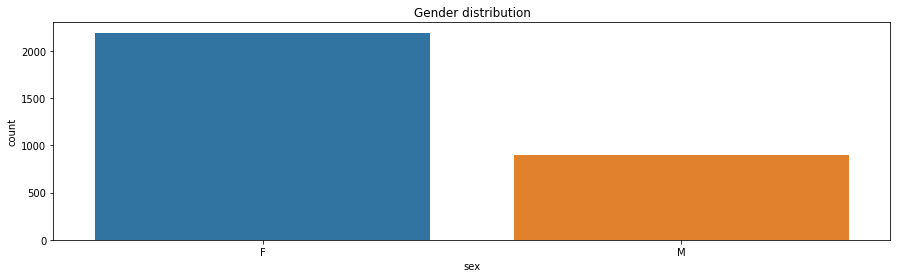

In [108]:
#gender distribution
plt.figure(figsize=(15, 4))
sns.countplot(dfclean['sex'], order = dfclean['sex'].value_counts().index);
plt.title('Gender distribution')

Bivariate analysis

Pair plot

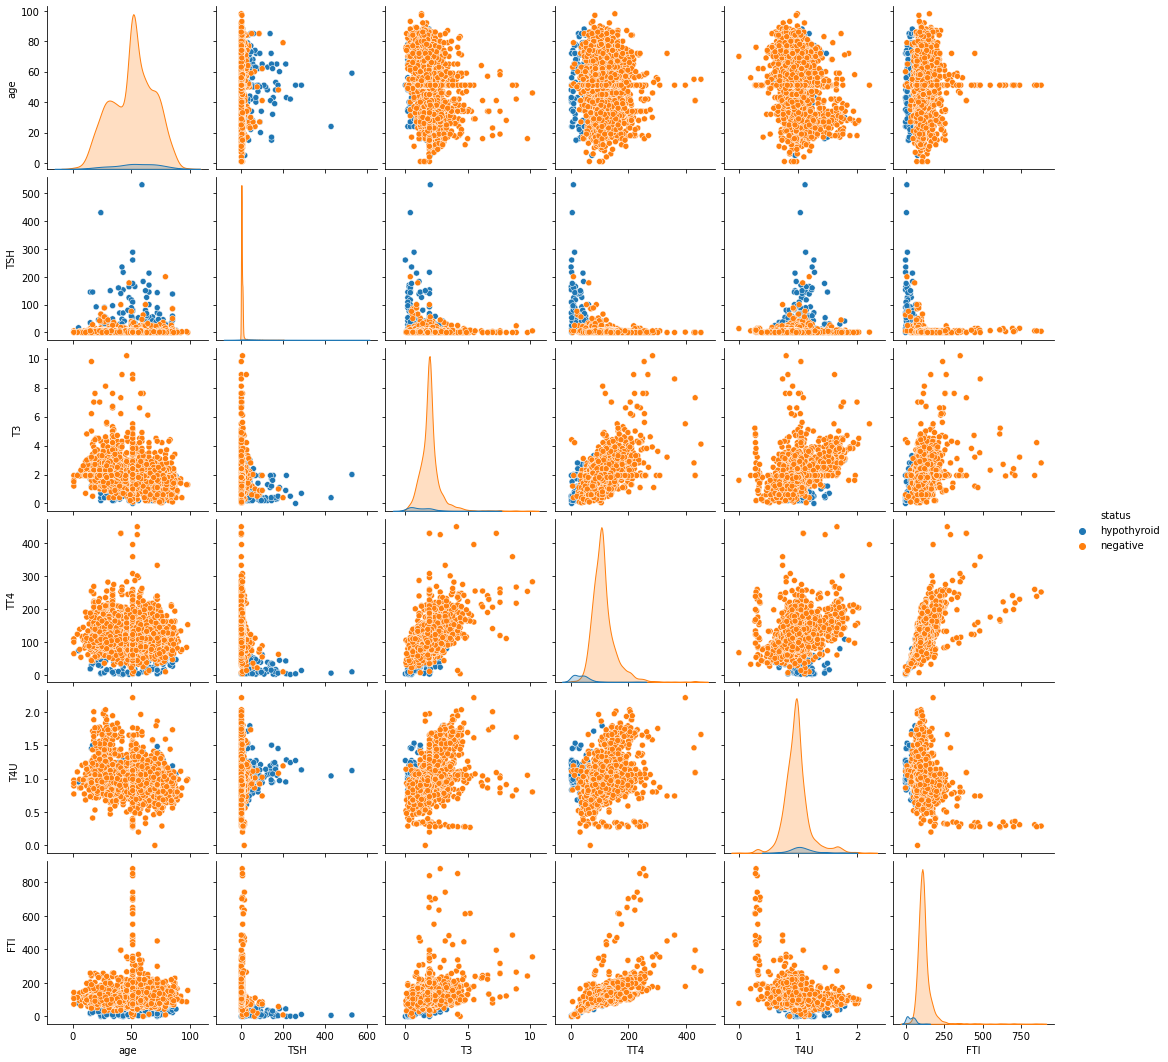

In [109]:
sns.pairplot(dfclean, hue="status")
plt.show()

Heatmap

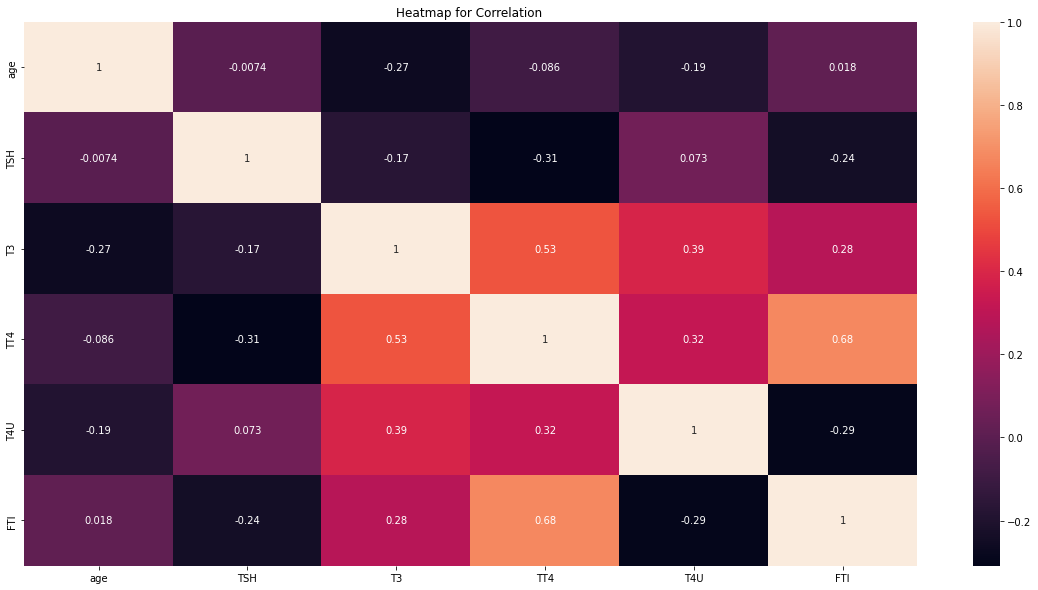

In [110]:
cor = dfclean.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True)
plt.title('Heatmap for Correlation ')
plt.show()

## Decision Trees

In [111]:
#Label encode some columns
dfclean = dfclean.replace({"t":1,"f":0, "y":1, "n":0, "hypothyroid":1, "negative":0, "F":1, "M":0})

In [112]:
dfclean.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,1,72.0,0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0
1,1,15.0,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0
2,1,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0
3,1,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0
4,1,77.0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0


In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# task is to predict if someone is a social drinker making that the Y value
y = dfclean['status'].values
test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI']


X = dfclean[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [114]:
# Create a decision tree classifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)


from sklearn import metrics
# Model Accuracy score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9870550161812298


We get an accuracy score of 0.98 which is pretty high

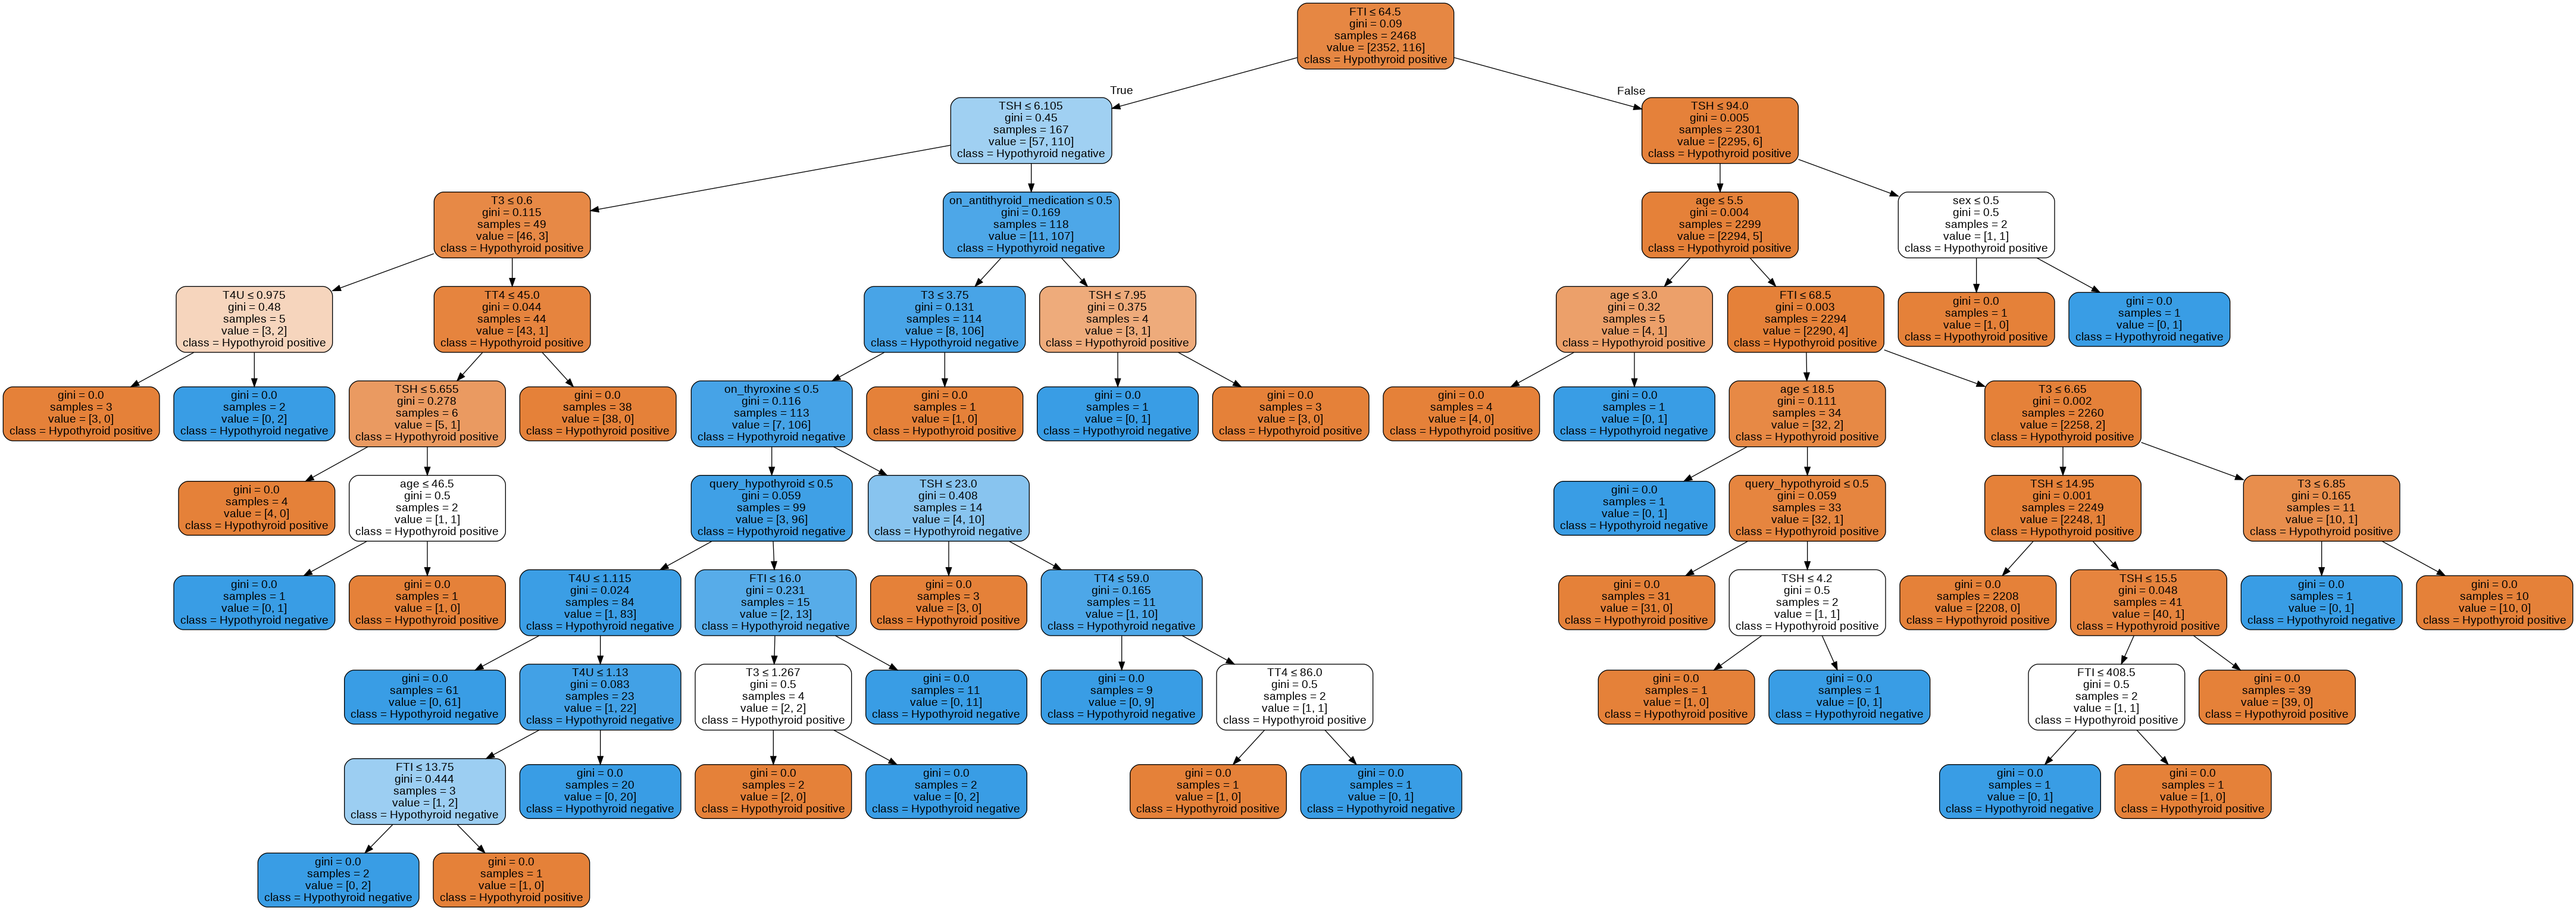

In [115]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['Hypothyroid positive', 'Hypothyroid negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid.png')
Image(graph.create_png())

In [116]:
# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
y = dfclean['status'].values


test_features = dfclean.columns.to_list()
test_features.remove('status')
X = dfclean[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(comparison_frame.describe())

from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

           Actual   Predicted
count  618.000000  618.000000
mean     0.040453    0.041691
std      0.197179    0.181866
min      0.000000    0.000154
25%      0.000000    0.000154
50%      0.000000    0.000154
75%      0.000000    0.000154
max      1.000000    0.990148
Mean Absolute Error: 0.012572259273748585
Mean Squared Error: 0.005640924847397697
Root Mean Squared Error: 0.07510609061452804


In [117]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.02), ('sex', 0.0), ('on_thyroxine', 0.01), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.02), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.01), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.26), ('T3_measured', 0.0), ('T3', 0.03), ('TT4_measured', 0.0), ('TT4', 0.01), ('T4U_measured', 0.0), ('T4U', 0.01), ('FTI_measured', 0.0), ('FTI', 0.62)]

Variable: FTI                  Importance: 0.62
Variable: TSH                  Importance: 0.26
Variable: T3                   Importance: 0.03
Variable: age                  Importance: 0.02
Variable: on_antithyroid_medication Importance: 0.02
Variable: on_thyroxine         Importance: 0.01
Variable: query_hypothyroid    Importance: 0.01
Variable: TT4                  Importance: 0.01
Variable: T4U                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: query_on_thyroxine   Importa

In [118]:
# Split the independent and dependent variables
# task is to predict if someone is a social drinker making that the Y value
y = dfclean['status'].values

selected_features = dfclean[['FTI','TSH','T3','TT4','age','on_antithyroid_medication','on_thyroxine','query_hypothyroid','T3_measured','T4U']]
test_features = selected_features.columns.to_list()

X = dfclean[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(comparison_frame.describe())

from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

           Actual   Predicted
count  618.000000  618.000000
mean     0.040453    0.041728
std      0.197179    0.181675
min      0.000000    0.000154
25%      0.000000    0.000154
50%      0.000000    0.000154
75%      0.000000    0.000154
max      1.000000    0.990148
Mean Absolute Error: 0.01270739591935071
Mean Squared Error: 0.0056728924665336855
Root Mean Squared Error: 0.07531860637673593


In [119]:
#gradient boosted regressor
# Split the independent and dependent variables
# let us use all the features
X = dfclean.drop('status', axis =1)
y = dfclean.status

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Performing standard scalar normalization to normalize our feature set.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform (X_test)
from sklearn.ensemble import GradientBoostingClassifier
# Instantiating the model
gradboost = GradientBoostingClassifier(loss='deviance',n_estimators=200, learning_rate=0.01, max_depth=5)
gradboost = gradboost.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred = gradboost.predict(X_test)

from sklearn import metrics

# Measuring the accuracy of the model on the test dataset
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Making predictions for our train dataset
y_pred = gradboost.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.9838187702265372
Accuracy: 0.9991896272285251


Support Vector Machine(SVM)

In [120]:
# let us use all the features
X = dfclean[['FTI', 'TSH']]
y = dfclean.status

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardising the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [121]:
from sklearn.svm import SVC
# Fit the model
linear = SVC(kernel= 'linear')
linear.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred = linear.predict(X_test)

# accuracy score of the train model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

y_pred = linear.predict(X_train)

# accuracy score of the train model
print(f'Accuracy : {accuracy_score(y_train, y_pred)}')
print(confusion_matrix(y_train, y_pred))

Accuracy: 0.9794816414686826
[[885   3]
 [ 16  22]]
Accuracy : 0.9819444444444444
[[2046   11]
 [  28   75]]


In [122]:
# Fit the model
poly = SVC(kernel= 'poly')
poly.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred = poly.predict(X_test)

# accuracy score of the test model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))


y_pred = poly.predict(X_train)

# accuracy score of the train model
print('\n')
print(f'Accuracy: {accuracy_score(y_train, y_pred)}')
print(confusion_matrix(y_train, y_pred))

Accuracy: 0.980561555075594
[[885   3]
 [ 15  23]]


Accuracy: 0.9833333333333333
[[2049    8]
 [  28   75]]


In [123]:
rbf = SVC(kernel= 'rbf')
rbf.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred= rbf.predict(X_test)

# accuracy score of the test model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))


y_pred = rbf.predict(X_train)

# accuracy score of the train model
print(f'Accuracy: {accuracy_score(y_train, y_pred)}')
print(confusion_matrix(y_train, y_pred))

Accuracy: 0.9838012958963283
[[885   3]
 [ 12  26]]
Accuracy: 0.9851851851851852
[[2049    8]
 [  24   79]]


The accuracy in the rbf kernel is highest, we will opt to go for that.